# Utility functions

In [1]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, balanced_accuracy_score,  classification_report, ConfusionMatrixDisplay

def show_ConfusionMatrix_test(y_test, y_test_pred, test_confusion_matrix_title = "Confusion Matrix (Test)"):
  conf_matrix_log_reg = confusion_matrix(y_test, y_test_pred)
  print("Confusion Matrix (Test):")
  print(conf_matrix_log_reg)
  ConfusionMatrixDisplay(conf_matrix_log_reg).plot()
  plt.title(test_confusion_matrix_title)
  plt.show()
'''
def find_optimal_threshold(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters:
    target : Matrix with dependent or target data, where rows are observations
    predicted : Matrix with predicted data, where rows are observations

    Returns:
    list type, with optimal cutoff value
    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr))
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold'])
'''

def get_precision_and_recall(y, y_pred):
  return round(precision_score(y, y_pred), 4), round(recall_score(y, y_pred), 4)

# Download dataset from Kaggle

In [5]:
# Install Kaggle API
!pip install kaggle

# Make a directory for the Kaggle credentials and move the JSON file there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Set permissions for the JSON file
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d manishkc06/startup-success-prediction

# Unzip the downloaded file
!unzip startup-success-prediction.zip

!ls

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/manishkc06/startup-success-prediction
License(s): CC0-1.0
  0% 0.00/64.1k [00:00<?, ?B/s]
100% 64.1k/64.1k [00:00<00:00, 37.5MB/s]
Archive:  startup-success-prediction.zip
  inflating: startup data.csv        
 sample_data  'startup data.csv'   startup-success-prediction.zip


# Explore and adjust data

## functions

### add economic info

In [82]:
# Affect acquisitions
def add_nasdaq_annual_changes(df):
  nasdaq_annual_changes = {
    1984: -3.66, 1985: 32.99, 1986: 14.82, 1987: 3.53, 1988: 12.06, 1989: 19.20,
    1990: -17.80, 1991: 56.82, 1992: 15.52, 1993: 14.75, 1994: -3.20, 1995: 39.92,
    1996: 22.71, 1997: 21.64, 1998: 39.63, 1999: 85.59, 2000: -39.29, 2001: -21.05,
    2002: -31.53, 2003: 50.01, 2004: 8.59, 2005: 1.37, 2006: 9.52, 2007: 9.81,
    2008: -40.54, 2009: 43.89, 2010: 16.91, 2011: -1.80, 2012: 15.91, 2013: 38.32,
    2014: 13.40, 2015: 5.73, 2016: 7.50, 2017: 28.24, 2018: -3.88, 2019: 35.23,
    2020: 43.64, 2021: 21.39, 2022: -33.10, 2023: 35.03, 2024: 8.00  # 2024 is an estimate
  }

  df['nasdaq_annual_changes_at_year_0'] = df['founded_at_year'].map(nasdaq_annual_changes)
  df['nasdaq_annual_changes_at_year_1'] = df.founded_at_year.apply(lambda x: nasdaq_annual_changes.get(x-1, None))
  df['nasdaq_annual_changes_at_year_2'] = df.founded_at_year.apply(lambda x: nasdaq_annual_changes.get(x-2, None))
  df['nasdaq_annual_changes_at_year_3'] = df.founded_at_year.apply(lambda x: nasdaq_annual_changes.get(x-3, None))
  df['nasdaq_annual_changes_at_year_4'] = df.founded_at_year.apply(lambda x: nasdaq_annual_changes.get(x-4, None))
  df['nasdaq_annual_changes_at_year_5'] = df.founded_at_year.apply(lambda x: nasdaq_annual_changes.get(x-5, None))
  df['nasdaq_annual_changes_at_year_6'] = df.founded_at_year.apply(lambda x: nasdaq_annual_changes.get(x-6, None))
  df['nasdaq_annual_changes_at_year_7'] = df.founded_at_year.apply(lambda x: nasdaq_annual_changes.get(x-7, None))
  df['nasdaq_annual_changes_at_year_8'] = df.founded_at_year.apply(lambda x: nasdaq_annual_changes.get(x-8, None))
  df['nasdaq_annual_changes_at_year_9'] = df.founded_at_year.apply(lambda x: nasdaq_annual_changes.get(x-9, None))
  df['nasdaq_annual_changes_at_year_10'] = df.founded_at_year.apply(lambda x: nasdaq_annual_changes.get(x-10, None))
  return df

# Affect workforce and investments
def add_info_on_inflation_over_years(df):
  us_inflation_data = {
      1984: 4.3, 1985: 3.6, 1986: 1.9, 1987: 3.6, 1988: 4.1, 1989: 4.8,
      1990: 5.4, 1991: 4.2, 1992: 3.0, 1993: 2.7, 1994: 2.6, 1995: 2.8,
      1996: 3.0, 1997: 2.3, 1998: 1.6, 1999: 2.2, 2000: 3.4, 2001: 2.8,
      2002: 1.6, 2003: 2.3, 2004: 2.7, 2005: 3.4, 2006: 3.2, 2007: 2.8,
      2008: 3.8, 2009: -0.4, 2010: 1.6, 2011: 3.2, 2012: 2.1, 2013: 1.5,
      2014: 1.6, 2015: 0.1, 2016: 1.3, 2017: 2.1, 2018: 2.4, 2019: 1.8,
      2020: 1.2, 2021: 4.7, 2022: 8.0, 2023: 3.2, 2024: 2.5  # 2024 is an estimate
  }

  df['inflation_at_year_0'] = df['founded_at_year'].map(us_inflation_data)
  df['inflation_at_year_1'] = df.founded_at_year.apply(lambda x: us_inflation_data.get(x-1, None))
  df['inflation_at_year_2'] = df.founded_at_year.apply(lambda x: us_inflation_data.get(x-2, None))
  df['inflation_at_year_3'] = df.founded_at_year.apply(lambda x: us_inflation_data.get(x-3, None))

  df['inflation_at_year_4'] = df.founded_at_year.apply(lambda x: us_inflation_data.get(x-4, None))
  df['inflation_at_year_5'] = df.founded_at_year.apply(lambda x: us_inflation_data.get(x-5, None))
  df['inflation_at_year_6'] = df.founded_at_year.apply(lambda x: us_inflation_data.get(x-6, None))
  df['inflation_at_year_7'] = df.founded_at_year.apply(lambda x: us_inflation_data.get(x-7, None))
  df['inflation_at_year_8'] = df.founded_at_year.apply(lambda x: us_inflation_data.get(x-8, None))
  df['inflation_at_year_9'] = df.founded_at_year.apply(lambda x: us_inflation_data.get(x-9, None))
  df['inflation_at_year_10'] = df.founded_at_year.apply(lambda x: us_inflation_data.get(x-10, None))

  return df

# Affect workforce and ivestments
def add_us_gdp_growth_data_over_years(df):
    us_gdp_growth_data = {
        1984: 7.3, 1985: 4.2, 1986: 3.5, 1987: 3.5, 1988: 4.2, 1989: 3.7,
        1990: 1.9, 1991: -0.1, 1992: 3.6, 1993: 2.8, 1994: 4.0, 1995: 2.7,
        1996: 3.8, 1997: 4.5, 1998: 4.5, 1999: 4.8, 2000: 4.1, 2001: 1.0,
        2002: 1.7, 2003: 2.9, 2004: 3.8, 2005: 3.5, 2006: 2.9, 2007: 1.9,
        2008: -0.1, 2009: -2.5, 2010: 2.6, 2011: 1.6, 2012: 2.2, 2013: 1.8,
        2014: 2.5, 2015: 3.1, 2016: 1.6, 2017: 2.4, 2018: 2.9, 2019: 2.3,
        2020: -3.4, 2021: 5.9, 2022: 2.1, 2023: 2.0, 2024: 2.3  # 2024 is an estimate
    }

    df['gdp_growth_at_year_0'] = df['founded_at_year'].map(us_gdp_growth_data)
    df['gdp_growth_at_year_1'] = df.founded_at_year.apply(lambda x: us_gdp_growth_data.get(x-1, None))
    df['gdp_growth_at_year_2'] = df.founded_at_year.apply(lambda x: us_gdp_growth_data.get(x-2, None))
    df['gdp_growth_at_year_3'] = df.founded_at_year.apply(lambda x: us_gdp_growth_data.get(x-3, None))

    df['gdp_growth_at_year_4'] = df.founded_at_year.apply(lambda x: us_gdp_growth_data.get(x-4, None))
    df['gdp_growth_at_year_5'] = df.founded_at_year.apply(lambda x: us_gdp_growth_data.get(x-5, None))
    df['gdp_growth_at_year_6'] = df.founded_at_year.apply(lambda x: us_gdp_growth_data.get(x-6, None))
    df['gdp_growth_at_year_7'] = df.founded_at_year.apply(lambda x: us_gdp_growth_data.get(x-7, None))
    df['gdp_growth_at_year_8'] = df.founded_at_year.apply(lambda x: us_gdp_growth_data.get(x-8, None))
    df['gdp_growth_at_year_9'] = df.founded_at_year.apply(lambda x: us_gdp_growth_data.get(x-9, None))
    df['gdp_growth_at_year_10'] = df.founded_at_year.apply(lambda x: us_gdp_growth_data.get(x-10, None))

    return df

# Affect workforce
def add_us_workforce_growth_data_over_years(df):
    us_workforce_growth_data = {
        1984: 1.5, 1985: 1.6, 1986: 1.5, 1987: 1.7, 1988: 1.6, 1989: 1.4,
        1990: 1.3, 1991: 1.1, 1992: 1.3, 1993: 1.2, 1994: 1.4, 1995: 1.2,
        1996: 1.3, 1997: 1.2, 1998: 1.3, 1999: 1.2, 2000: 1.2, 2001: 0.9,
        2002: 0.8, 2003: 0.7, 2004: 1.1, 2005: 1.2, 2006: 1.1, 2007: 1.1,
        2008: 0.7, 2009: -0.3, 2010: 0.7, 2011: 0.7, 2012: 1.0, 2013: 0.9,
        2014: 1.0, 2015: 1.2, 2016: 1.1, 2017: 1.0, 2018: 1.3, 2019: 1.0,
        2020: -2.3, 2021: 2.5, 2022: 1.8, 2023: 1.0, 2024: 1.1  # 2024 is an estimate
    }

    df['workforce_growth_at_year_0'] = df['founded_at_year'].map(us_workforce_growth_data)
    df['workforce_growth_at_year_1'] = df.founded_at_year.apply(lambda x: us_workforce_growth_data.get(x-1, None))
    df['workforce_growth_at_year_2'] = df.founded_at_year.apply(lambda x: us_workforce_growth_data.get(x-2, None))
    df['workforce_growth_at_year_3'] = df.founded_at_year.apply(lambda x: us_workforce_growth_data.get(x-3, None))

    df['workforce_growth_at_year_4'] = df.founded_at_year.apply(lambda x: us_workforce_growth_data.get(x-4, None))
    df['workforce_growth_at_year_5'] = df.founded_at_year.apply(lambda x: us_workforce_growth_data.get(x-5, None))
    df['workforce_growth_at_year_6'] = df.founded_at_year.apply(lambda x: us_workforce_growth_data.get(x-6, None))
    df['workforce_growth_at_year_7'] = df.founded_at_year.apply(lambda x: us_workforce_growth_data.get(x-7, None))
    df['workforce_growth_at_year_8'] = df.founded_at_year.apply(lambda x: us_workforce_growth_data.get(x-8, None))
    df['workforce_growth_at_year_9'] = df.founded_at_year.apply(lambda x: us_workforce_growth_data.get(x-9, None))
    df['workforce_growth_at_year_10'] = df.founded_at_year.apply(lambda x: us_workforce_growth_data.get(x-10, None))

    return df




### add & adjust data

In [83]:
def read_and_adjust(file_name = 'startup data.csv'):
  # Load the data
  df = pd.read_csv(file_name)

  # Create lable
  df['status_code'] = df['status'].map({'acquired': 1, 'closed': 0})

  # Convert the date column to datetime
  df['founded_at_date'] = pd.to_datetime(df['founded_at'])

  # Extract year, month, and day into separate columns
  df['founded_at_year'] = df['founded_at_date'].dt.year
  df['founded_at_month'] = df['founded_at_date'].dt.month
  df['founded_at_day'] = df['founded_at_date'].dt.day

  # Drop colums
  df = df.drop(columns=['status', 'founded_at', 'name', 'id', 'state_code', 'object_id', 'category_code', 'labels', 'closed_at'])

  #df = add_info_on_inflation_over_years(df)
  df = add_us_gdp_growth_data_over_years(df)
  #df = add_us_workforce_growth_data_over_years(df)
  df = add_nasdaq_annual_changes(df)

  return df

## run

In [79]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

df = read_and_adjust(file_name = 'startup data.csv')

# Display the first few rows of the data
df.columns

Index(['Unnamed: 0', 'latitude', 'longitude', 'zip_code', 'city', 'Unnamed: 6',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC',
       'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'status_code', 'founded_at_date',
       'founded_at_year', 'founded_at_month', 'founded_at_day',
       'inflation_at_year_0', 'inflation_at_year_1', 'inflation_at_year_2',
       'inflation_at_year_3', 'nasdaq_annual_changes_at_year_0',
       'nasdaq_annual_changes_at_year_1', 'nasdaq_annual_changes_

In [77]:
df.founded_at_year.value_counts()

founded_at_year
2006    107
2007    104
2005    102
2008     87
2009     82
2010     72
2004     71
2000     65
2003     64
2002     58
2001     41
2011     31
1999     11
2012     10
1998      4
2013      3
1997      3
1996      3
1985      1
1992      1
1990      1
1984      1
1995      1
Name: count, dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [48]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status', 'status_code'],
      dtype='object')

# PCA

### Number of components needed

Minimal number of components to explain 0.85 variance: 32


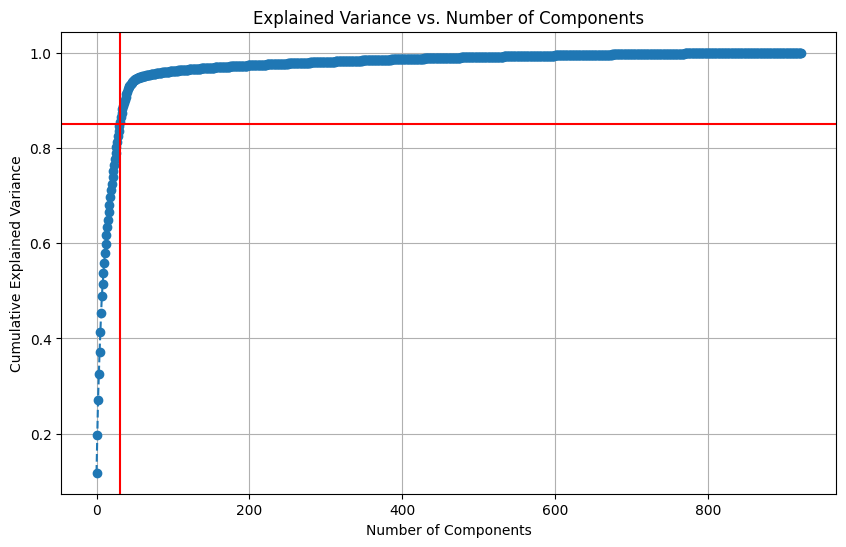

In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

thereshold_PCA = 0.85  # 3 components will explain only 20% of the data variance

#df = df.drop('status')
#df = df.drop('status_code')

# Identify categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['number']).columns

# OneHotEncode categorical columns
encoder = OneHotEncoder()
encoded_categorical = encoder.fit_transform(df[categorical_columns]).toarray()

# Create a DataFrame from the encoded categorical data
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

# Standardize numerical columns
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df[numerical_columns])

# Create a DataFrame from the scaled numerical data
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

# Combine encoded categorical and scaled numerical data
processed_df = pd.concat([encoded_categorical_df, scaled_numerical_df], axis=1)

# Replace NaN values with the average value of their respective columns
processed_df.fillna(processed_df.mean(), inplace=True)

# Perform PCA
pca = PCA()
principalComponents = pca.fit_transform(processed_df)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Find the number of components that explain at least thereshold_PCA of the variance
num_components = np.argmax(cumulative_explained_variance >= thereshold_PCA) + 1

print(f'Minimal number of components to explain {thereshold_PCA} variance: {num_components}')

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.axhline(y=thereshold_PCA, color='r', linestyle='-')
plt.axvline(x=num_components-1, color='r', linestyle='-')
plt.grid()
plt.show()

### PCA with 3 components

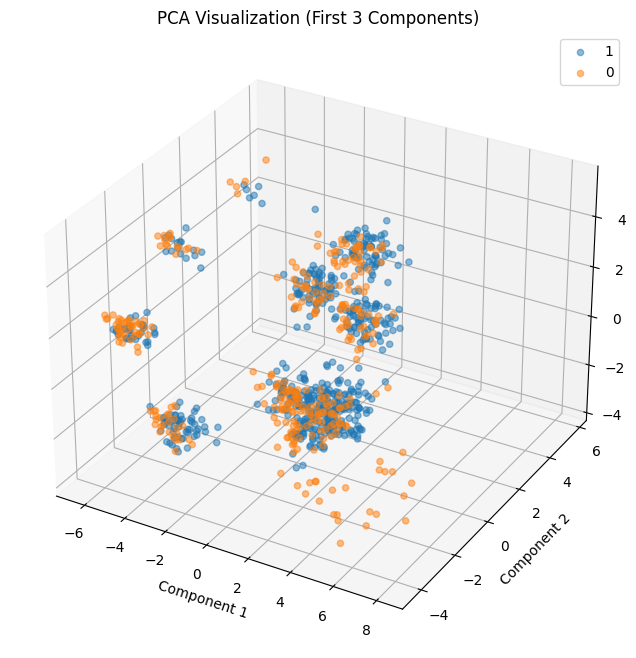

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Separate the 'status' column
status = df['status_code']

# Exclude the 'status' column from the features
df_pca = df.drop(columns=['status_code'])

# Identify categorical and numerical columns
categorical_columns = df_pca.select_dtypes(include=['object']).columns
numerical_columns = df_pca.select_dtypes(include=['number']).columns

# OneHotEncode categorical columns
encoder = OneHotEncoder()
encoded_categorical = encoder.fit_transform(df_pca[categorical_columns]).toarray()

# Create a DataFrame from the encoded categorical data
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

# Standardize numerical columns
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df_pca[numerical_columns])

# Create a DataFrame from the scaled numerical data
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

# Combine encoded categorical and scaled numerical data
processed_df = pd.concat([encoded_categorical_df, scaled_numerical_df], axis=1)

# Replace NaN values with the average value of their respective columns
processed_df.fillna(processed_df.mean(), inplace=True)

# Perform PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(processed_df)

# Create a DataFrame with the PCA results and the status
pca_df = pd.DataFrame(data=principalComponents, columns=['component_1', 'component_2', 'component_3'])
pca_df['status'] = status.values

# Plot the first three PCA components in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for target in pca_df['status'].unique():
    subset = pca_df[pca_df['status'] == target]
    ax.scatter(subset['component_1'], subset['component_2'], subset['component_3'], label=target, alpha=0.5)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('PCA Visualization (First 3 Components)')
ax.legend()
plt.show()

# TSN-E

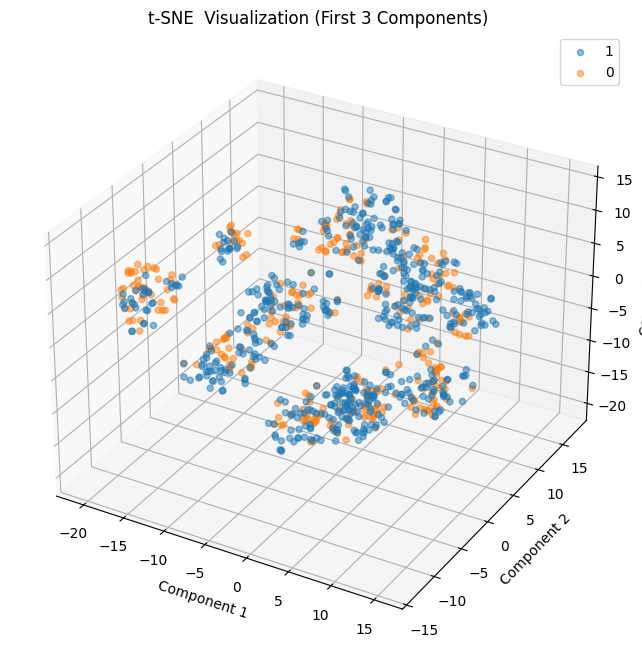

In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

df_tsne = df

# Identify categorical and numerical columns
categorical_columns = df_tsne.select_dtypes(include=['object']).columns
numerical_columns = df_tsne.select_dtypes(include=['number']).columns

# OneHotEncode categorical columns
encoder = OneHotEncoder()
encoded_categorical = encoder.fit_transform(df_tsne[categorical_columns]).toarray()

# Standardize numerical columns
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df_tsne[numerical_columns])

# Combine encoded categorical and scaled numerical data
processed_data = np.hstack((encoded_categorical, scaled_numerical))

# Create a DataFrame with the processed data
processed_df = pd.DataFrame(processed_data)

# Replace NaN values with the average value of their respective columns
processed_df.fillna(processed_df.mean(), inplace=True)


# Perform t-SNE
tsne = TSNE(n_components=3, random_state=42)
tsne_components = tsne.fit_transform(processed_df)

# Create a DataFrame with the t-SNE results and the status
tsne_df = pd.DataFrame(data=tsne_components, columns=['component_1', 'component_2', 'component_3'])
tsne_df['status'] = status.values

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for target in tsne_df['status'].unique():
    subset = tsne_df[tsne_df['status'] == target]
    ax.scatter(subset['component_1'], subset['component_2'], subset['component_3'], label=target, alpha=0.5)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('t-SNE  Visualization (First 3 Components)')
ax.legend()
plt.show()

# Data

In [24]:
df.columns

Index(['Unnamed: 0', 'latitude', 'longitude', 'zip_code', 'city', 'Unnamed: 6',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC',
       'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'status_code', 'founded_at_date',
       'founded_at_year', 'founded_at_month', 'founded_at_day',
       'inflation_at_year_0', 'inflation_at_year_1', 'inflation_at_year_2',
       'inflation_at_year_3', 'inflation_at_year_4', 'inflation_at_year_5',
       'inflation_at_year_6', 'inflation_at_year_7', '

In [54]:
df[['founded_at', 'first_funding_at', 'last_funding_at', 'state_code.1', 'has_roundC', 'has_roundD']].head()

,founded_at,first_funding_at,last_funding_at,state_code.1,has_roundC,has_roundD
0,1/1/2007,4/1/2009,1/1/2010,CA,0,0
1,1/1/2000,2/14/2005,12/28/2009,CA,1,1
2,3/18/2009,3/30/2010,3/30/2010,CA,0,0
3,1/1/2002,2/17/2005,4/25/2007,CA,1,1
4,8/1/2010,8/1/2010,4/1/2012,CA,0,0


# XGBoost classifier

## train model

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


optimal threshold is 0.7
AUC-ROC: 0.8
Accuracy: 0.79
Ballanced Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.58      0.63        57
           1       0.83      0.89      0.86       128

    accuracy                           0.79       185
   macro avg       0.76      0.73      0.75       185
weighted avg       0.79      0.79      0.79       185

Confusion Matrix (Test):
[[ 33  24]
 [ 14 114]]


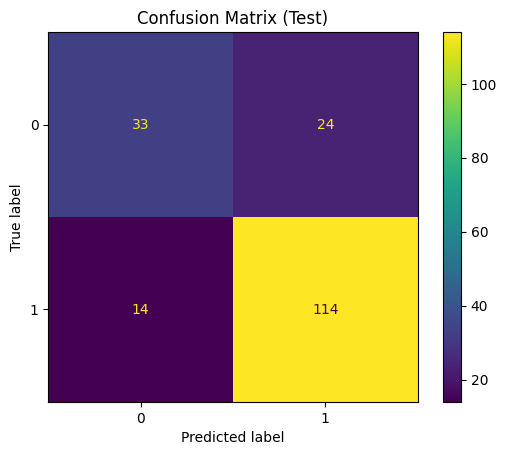

Precision (Test): 0.8261
Recall (Test): 0.8906


In [84]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

df = read_and_adjust(file_name = 'startup data.csv')

# Separate the 'status_code' column (target) and features
X = df.drop(columns=['status_code'])
y = df['status_code']

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['number']).columns

# OneHotEncode categorical columns
encoder = OneHotEncoder(sparse=False)
encoded_categorical = encoder.fit_transform(X[categorical_columns])

# Create DataFrame from encoded categorical data
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

# Standardize numerical columns
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(X[numerical_columns])

# Create DataFrame from scaled numerical data
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

# Combine encoded categorical and scaled numerical data
processed_df = pd.concat([encoded_categorical_df, scaled_numerical_df], axis=1)

# Replace NaN values with the average value of their respective columns
processed_df.fillna(processed_df.mean(), inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(processed_df, y, test_size=0.2, random_state=20)

# Train an XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train, y_train)

# Make predictions and predict probabilities
y_pred = xgb_clf.predict(X_test)
y_prob = xgb_clf.predict_proba(X_test)[:, 1]

th = 0.7 #find_optimal_threshold(y_test, y_pred)

print(f'optimal threshold is {th}')
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred > th)
report = classification_report(y_test, y_pred > th)
auc_roc = roc_auc_score(y_test, y_prob)
print(f'AUC-ROC: {round(auc_roc, 2)}')
print(f'Accuracy: {round(accuracy, 2)}')
print(f'Ballanced Accuracy: {round(balanced_accuracy_score(y_test, y_pred > th), 2)}')
print('Classification Report:')
print(report)
show_ConfusionMatrix_test(y_test, y_pred > th)
precision, recall = get_precision_and_recall(y_test,  y_pred > th)
print(f"Precision (Test): {precision}")
print(f"Recall (Test): {recall}")

## feature importance

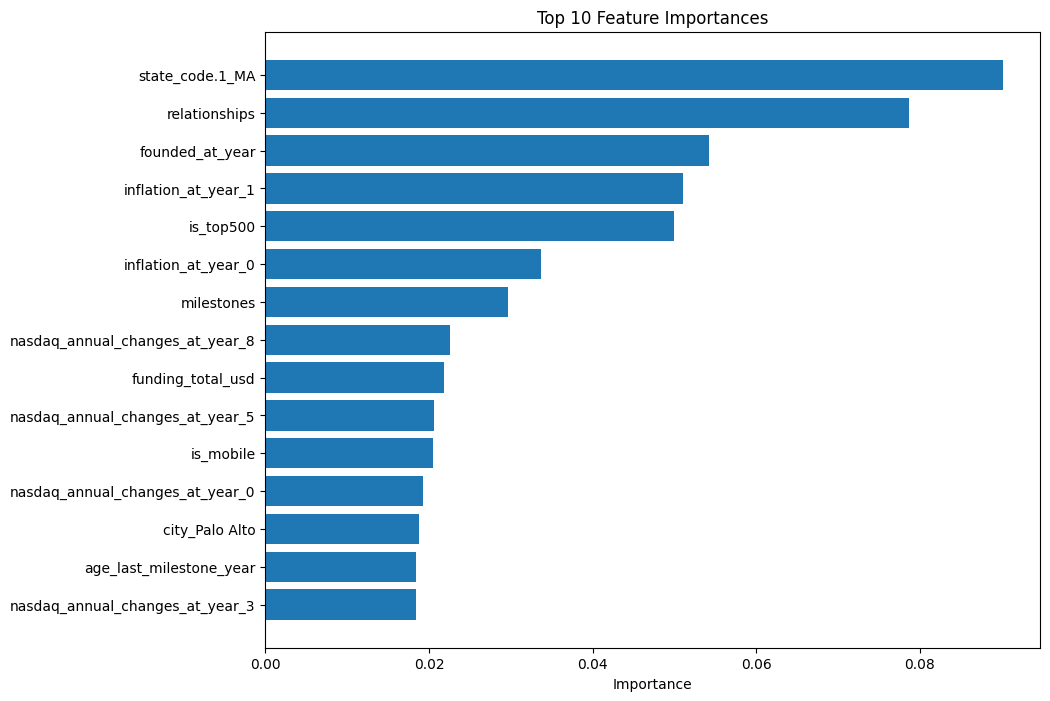

In [77]:
# Plot top 10 feature importances
importance = xgb_clf.feature_importances_
feature_names = processed_df.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

## AUC-ROC curve

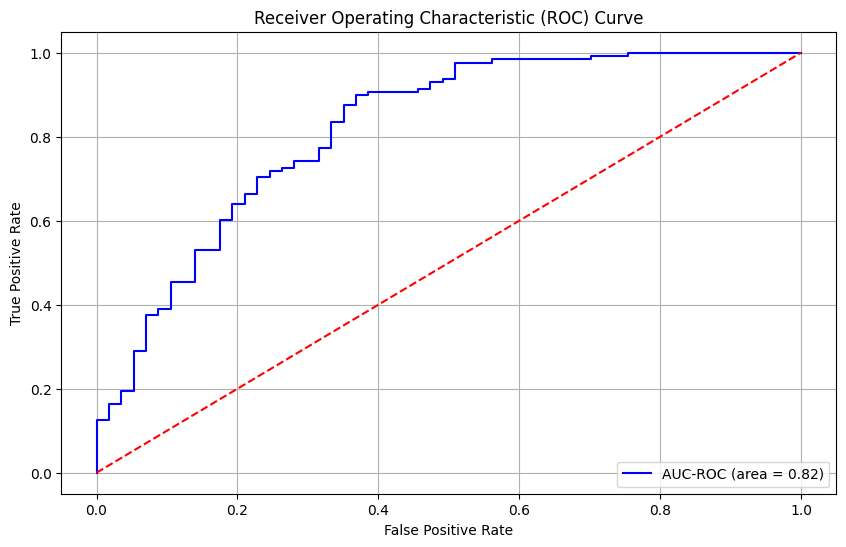

In [48]:
# Plot the AUC-ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC-ROC (area = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

## cross - validation

In [85]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, make_scorer, balanced_accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = read_and_adjust(file_name = 'startup data.csv')

# Separate the 'status_code' column (target) and features
X = df.drop(columns=['status_code'])
y = df['status_code']

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['number']).columns

# OneHotEncode categorical columns
encoder = OneHotEncoder(sparse=False)
encoded_categorical = encoder.fit_transform(X[categorical_columns])

# Create DataFrame from encoded categorical data
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

# Standardize numerical columns
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(X[numerical_columns])

# Create DataFrame from scaled numerical data
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

# Combine encoded categorical and scaled numerical data
processed_df = pd.concat([encoded_categorical_df, scaled_numerical_df], axis=1)

# Replace NaN values with the average value of their respective columns
processed_df.fillna(processed_df.mean(), inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(processed_df, y, test_size=0.2, random_state=20)

# Train an XGBoost classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'accuracy': 'accuracy',
    'balanced_accuracy': make_scorer(balanced_accuracy_score),
    'roc_auc': 'roc_auc',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'kappa': make_scorer(cohen_kappa_score)
}

cv_results = cross_validate(xgb_clf, X_train, y_train, cv=cv, scoring=scoring, return_train_score=False)
print(f"Cross-Validation Accuracy Scores: {cv_results['test_accuracy']}")
print(f"Mean Cross-Validation Accuracy: {round(cv_results['test_accuracy'].mean(), 2)}")
print(f"Cross-Validation Balanced Accuracy Scores: {cv_results['test_balanced_accuracy']}")
print(f"Mean Cross-Validation Balanced Accuracy: {round(cv_results['test_balanced_accuracy'].mean(), 2)}")
print(f"Cross-Validation AUC Scores: {cv_results['test_roc_auc']}")
print(f"Mean Cross-Validation AUC: {round(cv_results['test_roc_auc'].mean(), 2)}")
print(f"Cross-Validation Precision Scores: {cv_results['test_precision']}")
print(f"Mean Cross-Validation Precision: {round(cv_results['test_precision'].mean(), 2)}")
print(f"Cross-Validation Recall Scores: {cv_results['test_recall']}")
print(f"Mean Cross-Validation Recall: {round(cv_results['test_recall'].mean(), 2)}")
print(f"Cross-Validation F1 Scores: {cv_results['test_f1']}")
print(f"Mean Cross-Validation F1: {round(cv_results['test_f1'].mean(), 2)}")
print(f"Cross-Validation Kappa Scores: {cv_results['test_kappa']}")
print(f"Mean Cross-Validation Kappa: {round(cv_results['test_kappa'].mean(), 2)}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Cross-Validation Accuracy Scores: [0.80405405 0.77702703 0.79054054 0.78231293 0.68027211]
Mean Cross-Validation Accuracy: 0.77
Cross-Validation Balanced Accuracy Scores: [0.78270292 0.74172577 0.76024429 0.74337615 0.62305854]
Mean Cross-Validation Balanced Accuracy: 0.73
Cross-Validation AUC Scores: [0.89204098 0.80988968 0.8177699  0.77418707 0.69653524]
Mean Cross-Validation AUC: 0.8
Cross-Validation Precision Scores: [0.83505155 0.7961165  0.81188119 0.79807692 0.70909091]
Mean Cross-Validation Precision: 0.79
Cross-Validation Recall Scores: [0.86170213 0.87234043 0.87234043 0.88297872 0.83870968]
Mean Cross-Validation Recall: 0.87
Cross-Validation F1 Scores: [0.84816754 0.83248731 0.84102564 0.83838384 0.76847291]
Mean Cross-Validation F1: 0.83
Cross-Validation Kappa Scores: [0.57216906 0.50122549 0.53525122 0.50764078 0.26351135]
Mean Cross-Validation Kappa: 0.48


# Statistics

In [26]:
from scipy.stats import spearmanr, pearsonr

status_code = df['status_code']

def print_correlations_Spearman_and_Pearson(col1, status_code, text = ''):
  # Calculate Spearman and Pearson correlations
  spearman_corr, spearman_p_value = spearmanr(col1, status_code)
  pearson_corr, pearson_p_value = pearsonr(col1, status_code)

  print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_p_value}")
  print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_p_value}")

In [61]:
df['category_code_biotech'] = df['category_code'].apply(lambda x: 1 if x == 'biotech' else 0) #only 34 samples with 1
print_correlations_Spearman_and_Pearson(df['category_code_biotech'], df['status_code'])

Spearman correlation: 0.00010430465294688177, p-value: 0.9974750374061483
Pearson correlation: 0.00010430465294691135, p-value: 0.997475037406147


In [62]:
print_correlations_Spearman_and_Pearson(df['relationships'], df['status_code'])

Spearman correlation: 0.466947609250253, p-value: 3.63257569528578e-51
Pearson correlation: 0.3604336437709973, p-value: 1.0678742927712217e-29


In [63]:
print_correlations_Spearman_and_Pearson(df['avg_participants'], df['status_code'])

Spearman correlation: 0.226498446014084, p-value: 3.3408410636154857e-12
Pearson correlation: 0.18599162866024174, p-value: 1.2506004126542971e-08


In [64]:
print_correlations_Spearman_and_Pearson(df['has_roundC'], df['status_code'])

Spearman correlation: 0.1659015104590796, p-value: 4.008095143462745e-07
Pearson correlation: 0.16590151045907975, p-value: 4.008095143462563e-07


In [65]:
print_correlations_Spearman_and_Pearson(df['has_roundD'], df['status_code'])

Spearman correlation: 0.13994040612339836, p-value: 1.9832511468107988e-05
Pearson correlation: 0.13994040612339825, p-value: 1.98325114681094e-05


In [35]:
# nasdaq is a better prediction feature then inflation
print('inflation_at_year_0')
print_correlations_Spearman_and_Pearson(df['inflation_at_year_0'], df['status_code'])
print('')
print('nasdaq_annual_changes_at_year_0')
print_correlations_Spearman_and_Pearson(df['nasdaq_annual_changes_at_year_0'], df['status_code'])

inflation_at_year_0
Spearman correlation: 0.05388007999435291, p-value: 0.10186129508867196
Pearson correlation: 0.021282901926964942, p-value: 0.5184147390791904

nasdaq_annual_changes_at_year_0
Spearman correlation: -0.10863274195416212, p-value: 0.0009474723785658798
Pearson correlation: -0.11537089294842416, p-value: 0.00044465261004145076


In [39]:
#print_correlations_Spearman_and_Pearson(df['gdp_growth_at_year_0'], df['status_code'])

Spearman correlation: -0.027197405233611416, p-value: 0.4091927715092124
Pearson correlation: -0.041694827641564125, p-value: 0.20567036610913372
